In [1]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

In [2]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
    (
        "system","You are a python expert and code reviewer. Generate critique and recommendation for improving user's code about adehernce to pep8 programming style and code comments."
        "Give specific instructions to improve the provided code"
    ),
    MessagesPlaceholder(variable_name="messages")
    ]
)

In [3]:
print (reflection_prompt)

input_variables=['messages'] input_types={'messages': typing.List[typing.Union[langchain_core.messages.ai.AIMessage, langchain_core.messages.human.HumanMessage, langchain_core.messages.chat.ChatMessage, langchain_core.messages.system.SystemMessage, langchain_core.messages.function.FunctionMessage, langchain_core.messages.tool.ToolMessage]]} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template="You are a python expert and code reviewer. Generate critique and recommendation for improving user's code about adehernce to pep8 programming style and code comments.Give specific instructions to improve the provided code")), MessagesPlaceholder(variable_name='messages')]


In [4]:
reflection_prompt.invoke({"messages":["Who are you"]})

ChatPromptValue(messages=[SystemMessage(content="You are a python expert and code reviewer. Generate critique and recommendation for improving user's code about adehernce to pep8 programming style and code comments.Give specific instructions to improve the provided code"), HumanMessage(content='Who are you')])

In [5]:
generation_prompt = ChatPromptTemplate.from_messages(
    [
    (
        "system","You are a python coder tasked with writing python code."
        "If the user responds with a critique, respond with the revised correct code addressing the feedback"
    ),
    MessagesPlaceholder(variable_name="messages")
    ]
)

In [6]:
llm = ChatOpenAI(api_key=open("/home/ankdesh/explore/openai-key").readline().strip())

In [7]:
generate_chain = generation_prompt | llm
reflect_chain = reflection_prompt | llm

In [8]:
from typing import List, Sequence

In [9]:
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph

In [10]:
def generation_node (state: Sequence[BaseMessage]):
    return generate_chain.invoke({"messages":state})

In [11]:
def reflection_node (messages: Sequence[BaseMessage]) -> List[BaseMessage]:
    res = reflect_chain.invoke ({"messages": messages})
    return [HumanMessage(content=res.content)] 


In [12]:
builder = MessageGraph()
builder.add_node("generate", generation_node)
builder.add_node("reflect", reflection_node)

builder.set_entry_point ("generate")

In [13]:
def should_continue(state: List[BaseMessage]):
    if len(state) > 6:
        return END
    return "reflect"

In [14]:
builder.add_edge("reflect", "generate")
builder.add_conditional_edges("generate", should_continue)

In [15]:
graph = builder.compile()

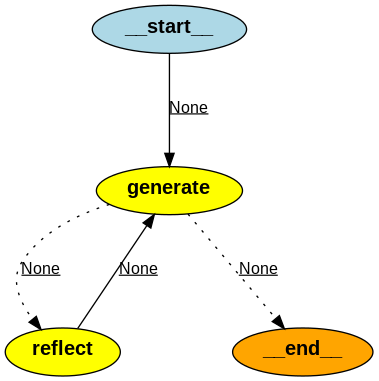

In [16]:
from IPython.display import Image
Image(graph.get_graph().draw_png())

In [17]:
print (graph.get_graph().draw_mermaid())

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([__start__]):::first
	generate(generate)
	reflect(reflect)
	__end__([__end__]):::last
	__start__ --> generate;
	reflect --> generate;
	generate -.-> reflect;
	generate -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



In [18]:
inputs = HumanMessage(content="Write the code for calculating fibbocci series.")
response = graph.invoke(input=inputs)

In [22]:
from pprint import pprint
for res in response:
    pprint (res.content)
    print ("*****************************************")

'Write the code for calculating fibbocci series.'
*****************************************
('Sure, here is the code to calculate the Fibonacci series:\n'
 '\n'
 '```python\n'
 'def fibonacci(n):\n'
 '    fib_series = [0, 1]\n'
 '    while len(fib_series) < n:\n'
 '        fib_series.append(fib_series[-1] + fib_series[-2])\n'
 '    return fib_series\n'
 '\n'
 'n = int(input("Enter the number of terms in Fibonacci series: "))\n'
 'fib_series = fibonacci(n)\n'
 'print(fib_series)\n'
 '```\n'
 '\n'
 'This code defines a function `fibonacci` that generates the Fibonacci series '
 'up to `n` terms and then prints the series based on user input.')
*****************************************
('To improve the code and adhere to PEP8 programming style, here are some '
 'recommendations:\n'
 '\n'
 '1. **Function and Variable Names**: Use lowercase with words separated by '
 'underscores for function names and variable names. For example, `fibonacci` '
 'should be `calculate_fibonacci`.\n'
 '\n'
 '